## Data Loading and Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

In [3]:
#reading training and validation data and its labels
train_data = pd.read_csv(parent_directory + '/Data/training_data.csv')
val_data = pd.read_csv(parent_directory + '/Data/validation_data.csv')

train_labels = train_data['label'].values
val_labels = val_data['label'].values

train_labels = np.array(train_labels,dtype='float64')
val_labels = np.array(val_labels,dtype='float64')

In [4]:
#converting the 784 images into (28,28,1) to train a CNN
train_images = []
val_images = []

for i in range(len(train_data)):
    train_images.append(train_data.iloc[i,:].values[1:].reshape(28,28,1))
for i in range(len(val_data)):
    val_images.append(val_data.iloc[i,:].values[1:].reshape(28,28,1))

In [5]:
def plot_img(img):
    plt.imshow(img, cmap='gray')
    plt.show()
    return

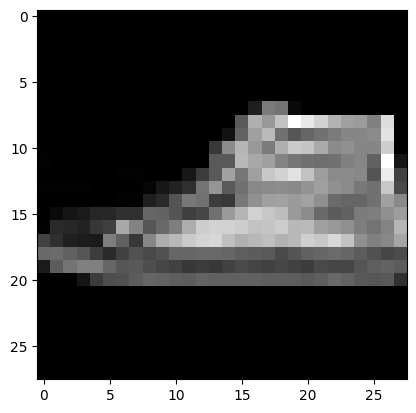

In [6]:
plot_img(train_images[1])

In [7]:
#scaling images so that the pixel values fall in between 0 and 1
train_images = np.array(train_images,dtype='float64')/255.0
val_images = np.array(val_images,dtype='float64')/255.0

train_labels = train_labels.reshape(train_labels.shape[0],1)
val_labels = val_labels.reshape(val_labels.shape[0],1)

In [8]:
#printing train validation split data shapes
print('Training Data Shape :', train_images.shape)
print('Training Labels Shape :', train_labels.shape)
print('Validation Data Shape :', val_images.shape)
print('Validation Labels Shape :', val_labels.shape)

Training Data Shape : (45000, 28, 28, 1)
Training Labels Shape : (45000, 1)
Validation Data Shape : (15000, 28, 28, 1)
Validation Labels Shape : (15000, 1)


## Training and Tuning CNN

In [54]:
from utils import ModelCNN

In [55]:
cnn = ModelCNN()

In [ ]:
parameter_grid = {
    "convolution1 filters" : [16, 32, 64],
    "convolution2 filters" : [32, 64, 128],
    "filter_size" : [2,3],
    "dense_layer" : [32, 64]
}

In [ ]:
best_parameters_cnn, best_accuracy_cnn, all_results_cnn = cnn.grid_search_cnn(train_images, train_labels, val_images, val_labels, parameter_grid,epochs= 20 )

In [ ]:
save_results_cnn = []
for dic in all_results_cnn:
    res_dic = {}
    res_dic['parameters'] = dic['parameters']
    res_dic['accuracy'] = dic['accuracy']
    save_results_cnn.append(res_dic)

In [ ]:
import json
file_path = "tuning_results/results_cnn.json"

# Write the list of dictionaries to the file
with open(file_path, 'w') as file:
    json.dump(save_results_cnn, file)

print(f"results has been saved to {file_path}")

## Training and Tuning ResNet

In [9]:
from utils import ModelResNet

In [10]:
res_net = ModelResNet()

In [11]:
parameter_grid = {
    "residual blocks" : [2, 3],
    "filters" : [16, 32, 64]
}

In [12]:
best_parameters_resnet, best_accuracy_resnet, all_results_resnet = res_net.grid_search_resnet(train_images, train_labels, val_images, val_labels, parameter_grid, epochs = 50)

469/469 [==============================] - 37s 79ms/step - loss: 0.2183 - accuracy: 0.9281


In [14]:
save_results_res = []
for dic in all_results_resnet:
    res_dic = {}
    res_dic['parameters'] = dic['parameters']
    res_dic['accuracy'] = dic['accuracy']
    save_results_res.append(res_dicb

In [17]:
import json
file_path = "tuning_results/results_res_1.json"

# Write the list of dictionaries to the file
with open(file_path, 'w') as file:
    json.dump(save_results_res, file)

print(f"results has been saved to {file_path}")

results has been saved to results_res_1.json
